<a href="https://colab.research.google.com/github/Maddie-Foster/QLC240_exercises/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 9: Importing and initial visualization of data that we will be modeling

The following exercises will be organized into 4 sections:
    1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
    2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
    3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
    4. Analysis of the best fit models from sections 2 and 3, to see if using data from the same geographic area results in a better model.

In [1]:
#Import packages needed to run code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Import the JMA dataset and visualize to see what we have.
IMport nitrate file as a pandas dataset.

In [15]:
infile = 'jma_nitrate.csv'
#Import infile as a pandas data frame and remove first column
data = pd.read_csv(infile, sep = (','))
data = data.drop(data.columns[0], axis=1)

#End the cell by visualizing the data variable, if that is what you called it, example:
data


,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,2.3991,34.4053,1204,42.96,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.334433
16217,2.2752,34.4674,1403,42.88,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.394058
16218,2.0916,34.5120,1602,42.20,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.444383
16219,1.9582,34.5527,1801,41.73,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.487322


Plotting a scater plot of nitrate and depth data from JMA cruise.
You might want to invert the axis, to make it look like an ocean water column.

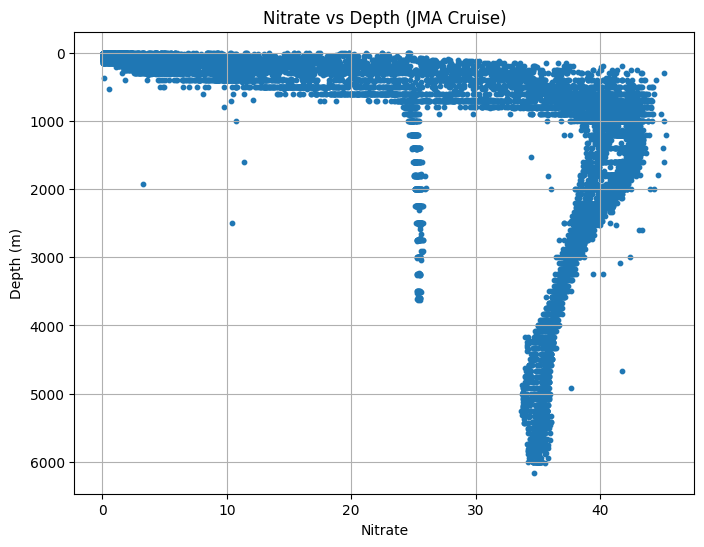

In [19]:
#Plot a scatter plot of nitrate and depth data from JMA cruise.
infile = 'jma_nitrate.csv'
#Import infile as a pandas data frame and remove first column
data = pd.read_csv(infile, sep = (','))
data = data.drop(data.columns[0], axis=1)

# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]

# Assuming 'corr_data' is your DataFrame with 'nitrate' and 'depth' columns
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(corr_data['nitrate'], corr_data['depth'], marker='o', s=10)  # s controls marker size
plt.xlabel('Nitrate')
plt.ylabel('Depth (m)')
plt.title('Nitrate vs Depth (JMA Cruise)')
plt.gca().invert_yaxis()  # Invert y-axis
plt.grid(True)
plt.show()


The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

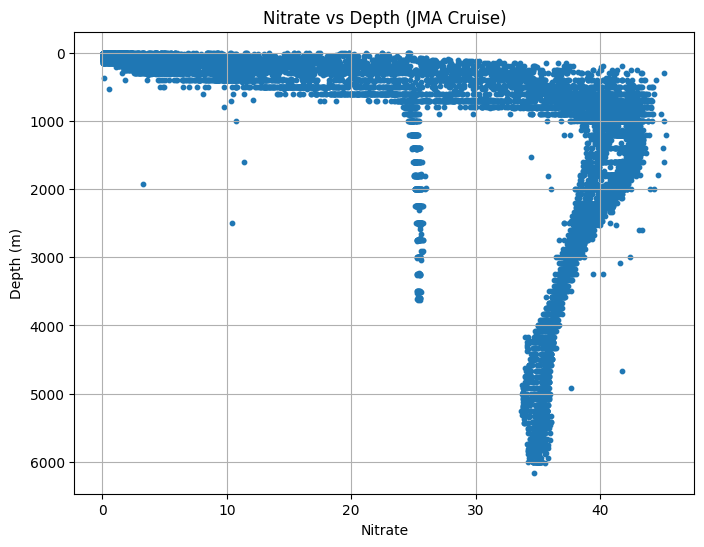

In [20]:
#Example:
# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
#Plot the corrected data in a scatter plot again.
# Remove rows with nitrate values of -999
#This line selects rows where 'nitrate' is not -999 and assigns the result back to 'data'
data = data[data['nitrate'] != -999]

#Plot the corrected data in a scatter plot again.

# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
# Assuming 'corr_data' is your DataFrame with 'nitrate' and 'depth' columns
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(corr_data['nitrate'], corr_data['depth'], marker='o', s=10)  # s controls marker size
plt.xlabel('Nitrate')
plt.ylabel('Depth (m)')
plt.title('Nitrate vs Depth (JMA Cruise)')
plt.gca().invert_yaxis()  # Invert y-axis to represent ocean depth
plt.grid(True)
plt.show()


The following cell will read in another file, and fix some date/time variables so they are managable. You don't need to change it at all, except you need to upload the .csv file itself.

In [21]:
# Reading in the Argo float data with no NO3 values
infile = 'kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))

# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
#data_BGC.head()

# Section 1, compare datasets (JMA, ARGO)

Compare the samples locations and see how the datasets overlap or don't overlap

In [22]:
#Plot the corrected data and the Argo float data "Latitude" and "Longitude" coordinates. If you're unsure of the column to choose, just look at the data and the column head names.
#Scatter plot for example

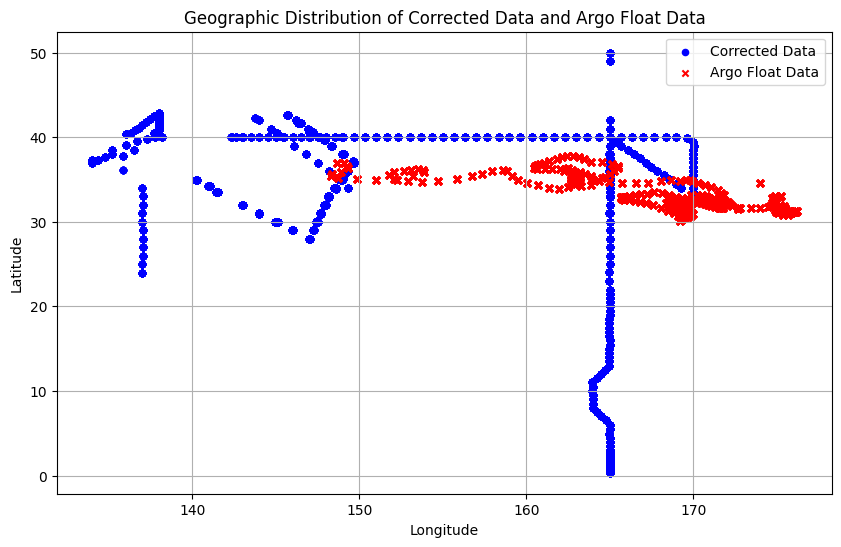

In [26]:
#Plot the corrected data and the Argo float data "Latitude" and "Longitude" coordinates.
# Assuming 'corr_data' is your DataFrame with 'Latitude' and 'Longitude' columns
# Assuming 'data_BGC' is your DataFrame with 'Latitude' and 'Longitude' columns

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot corrected data
# Changed 'Longitude' to 'lon' and 'Latitude' to 'lat' for corr_data
plt.scatter(corr_data['lon'], corr_data['lat'],
            marker='o', s=20, label='Corrected Data', color='blue')

# Plot Argo float data
# Changed 'Longitude (degrees_east)' to 'Longitude' and 'Latitude (degrees_north)' to 'Latitude' for data_BGC
plt.scatter(data_BGC['LON'], data_BGC['LAT'],
            marker='x', s=20, label='Argo Float Data', color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Corrected Data and Argo Float Data')
plt.legend()  # Show legend to distinguish data points
plt.grid(True)
plt.show()


Just from the geographic extend, we can see that the distribution of JMA samples is considerably higher than that of BCG ARGO samples. However big this despair, for this and other variables, there is some overlap in the sampled region, depths, and seasons. The geographical extent overlaps in the region between the ~30 to ~40° of latitude and ~150 to ~175° of longitude.

Compare the water masses that were sampled in both datasets

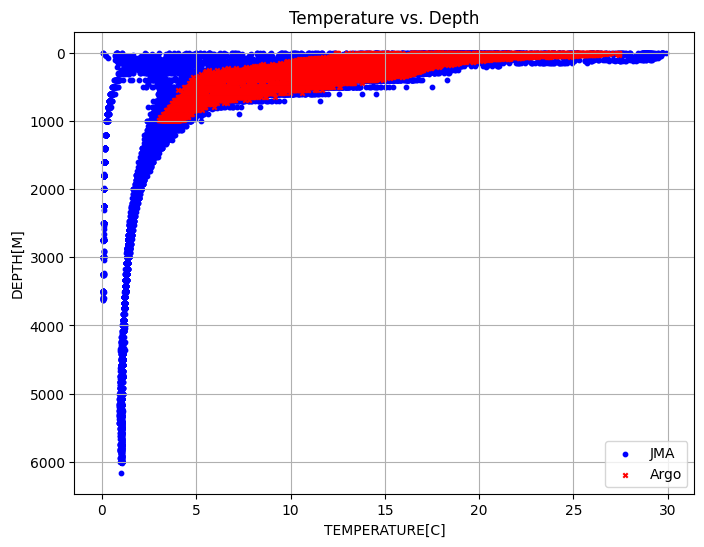

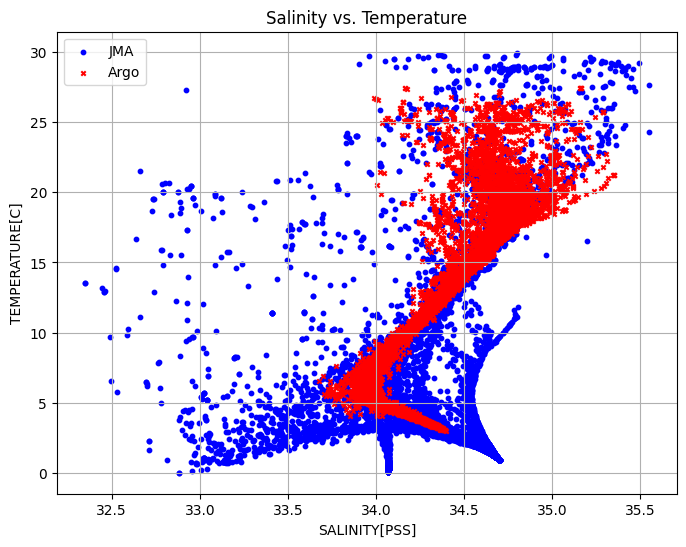

In [31]:
#Plot a scatter plot looking at the temperature vs depth profile, and seperate plot looking at salinity vs temperature. Each data source should be labeled differently.
# Temperature vs. Depth
plt.figure(figsize=(8, 6))
plt.scatter(corr_data['theta'], corr_data['depth'], marker='o', s=10, label='JMA', color='blue')
plt.scatter(data_BGC['TEMPERATURE[C]'], -1*data_BGC['DEPTH[M]'], marker='x', s=10, label='Argo', color='red')
plt.xlabel('TEMPERATURE[C]')
plt.ylabel('DEPTH[M]')
plt.title('Temperature vs. Depth')
plt.gca().invert_yaxis()  # Invert y-axis for ocean depth representation
plt.legend()
plt.grid(True)
plt.show()

# Salinity vs. Temperature
plt.figure(figsize=(8, 6))
plt.scatter(corr_data['sal'], corr_data['theta'], marker='o', s=10, label='JMA', color='blue')
plt.scatter(data_BGC['SALINITY[PSS]'], data_BGC['TEMPERATURE[C]'], marker='x', s=10, label='Argo', color='red')
plt.xlabel('SALINITY[PSS]')  # psu = Practical Salinity Units
plt.ylabel('TEMPERATURE[C]')
plt.title('Salinity vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()
